In [18]:
import itertools
import igraph as ig
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [2]:
def add_clique(g, clique=0, clique_size=5):
    vertex_names = [f'clique-{clique}-vertex-{v}' for v in range(clique_size)]
    for name in vertex_names:
        g.add_vertex(name)
    for u, v in itertools.combinations(vertex_names, r=2):
        g.add_edge(u, v)
    return vertex_names


def two_clique_graph():
    g = ig.Graph()
    clique0vertices = add_clique(g, 0, 5)
    clique1vertices = add_clique(g, 1, 5)
    g.add_edge(np.random.choice(clique0vertices), np.random.choice(clique1vertices))
    return g
    
    
def five_clique_graph():
    g = ig.Graph()
    clique_vertices = [add_clique(g, clique, 5) for clique in range(5)]
    for clique in range(4):
        g.add_edge(np.random.choice(clique_vertices[clique]), np.random.choice(clique_vertices[clique + 1]))
    return g

In [3]:
g = two_clique_graph()
# g = five_clique_graph()

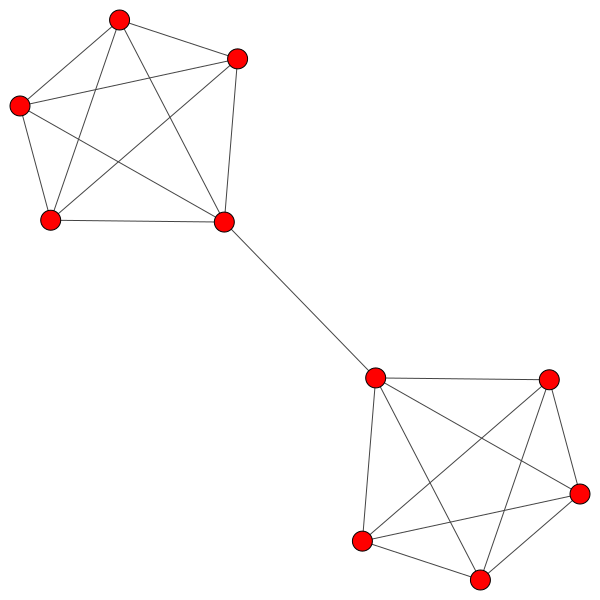

In [4]:
layout = g.layout_auto()
ig.plot(g, layout = layout)

Adjacency matrix, $W$

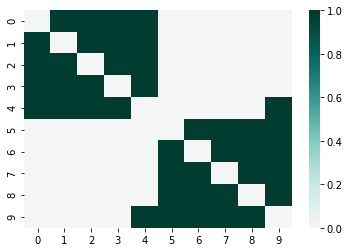

In [5]:
fig, ax = plt.subplots()
type(g.get_adjacency().data)
ax = sns.heatmap(g.get_adjacency().data, ax=ax, center=0, cmap='BrBG')

## Graph Laplacian

Unnormalised form

$$L = D - W$$

or the symmetric normalised Laplacian (same on degree homogeneous (regular) graphs)

$$L_\text{sym} = D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} L D^{-\frac{1}{2}}$$

or the normalised Laplacian associated with random walks

$$L_\text{rw} = D^{-1} W$$

### Smoothness

Why are we so interested in this graph Laplacian?
Given a vector of values $\mathbf{x}$ (one dimension for each vertex in the graph), the Laplacian quadratic form

$$\mathbf{x}^T L \mathbf{x} = \sum_{(i, j) \in E(G)} (x_i - x_j)^2$$

can be seen as a measure of how smooth $\mathbf{x}$ is over the graph.
So if we take the eigendecomposition of the Laplacian

$$L = Q \Lambda Q^{-1}$$

we can see that the eigenvectors with smallest eigenvalues are the smoothest over the graph (as defined by the quadratic form above).

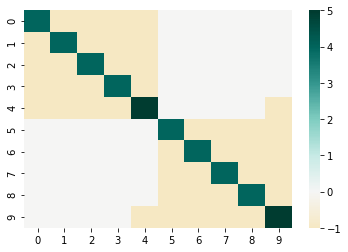

In [6]:
L = g.laplacian()
fig, ax = plt.subplots()
ax = sns.heatmap(L, ax=ax, center=0, cmap='BrBG')

## Spectral analysis

Solve the eigenproblem
$$L \mathbf{x} = \lambda \mathbf{x}$$

Note that the sum of each row of $L$ = 0. Hence any constant vector $\mathbf{1}$ is an eigenvector with eigenvalue $\lambda = 0$.

### Fiedler eigenvector
Suppose the graph had two connected components.
How could we easily find another eigenvector orthogonal to the first?
Note here the Laplacian will have a block diagonal structure.

### Generalised eigenproblem
Note sometimes people solve the generalised eigenproblem
$$L \mathbf{x} = \lambda D \mathbf{x}$$
but this is just the same as substituting
$$L' = D^{-1} L$$

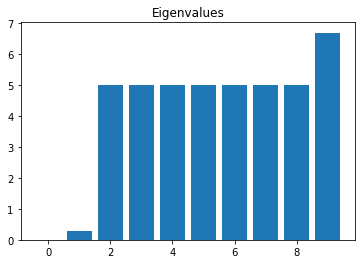

In [7]:
w, v = la.eigh(L)
fig, ax = plt.subplots()
ax.bar(np.arange(len(L)), w)
_ = ax.set_title('Eigenvalues')

In [8]:
vmax = np.abs(v).max()
cmap = cm.get_cmap('BrBG')

In [9]:
def set_evec_colors(g, v):
    scaled_evec = (v / vmax + 1) / 2
    g.vs['color'] = list(map(colors.rgb2hex, cmap(scaled_evec)))

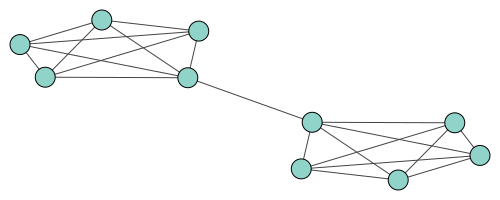

In [10]:
set_evec_colors(g, v[:, 0])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

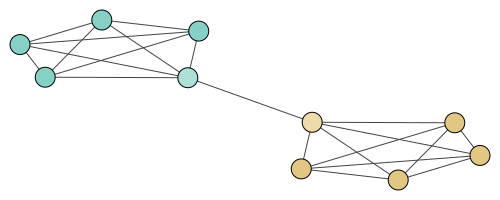

In [11]:
set_evec_colors(g, v[:, 1])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

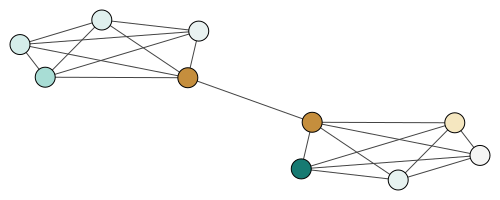

In [12]:
set_evec_colors(g, v[:, 2])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

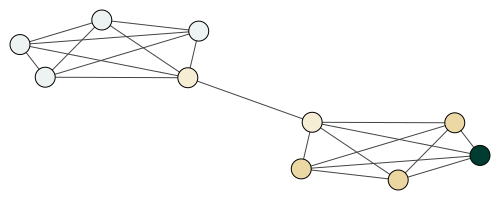

In [13]:
set_evec_colors(g, v[:, 3])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

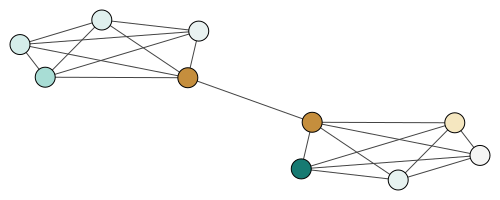

In [14]:
set_evec_colors(g, v[:, 2])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

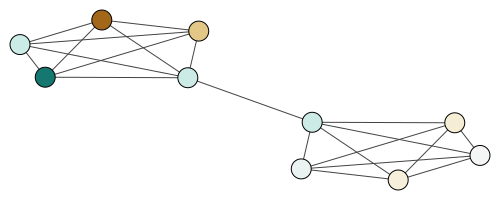

In [15]:
set_evec_colors(g, v[:, 4])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

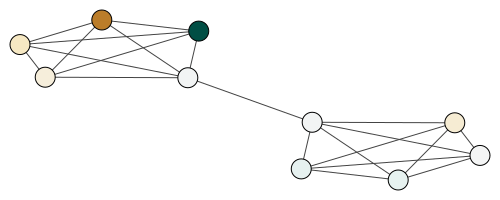

In [16]:
set_evec_colors(g, v[:, 5])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

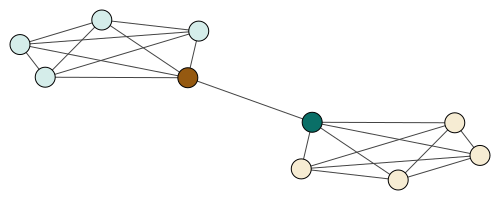

In [17]:
set_evec_colors(g, v[:, 9])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))